In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("modified_h3_summary_2.csv")

# 스타일 설정
sns.set(style="whitegrid")

# case 컬럼을 범주형으로 정렬
case_order = [0, 1, 2, 3]
df['case'] = pd.Categorical(df['case'], categories=case_order, ordered=True)

In [49]:
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.max_rows', None)  # 모든 행 표시

# 데이터프레임 출력
df

,trial,work,hot_compaction,cold_compaction,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,throughput,case
0,3,read,universal,universal,205.176,0,0,0,3070759,0,1000000,10347282432,1321139,2462473,0,1000000,0,0,0,47.947409,1199.967626,3433.098316,94264.0,1000000,200131914,200.131914,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.583411,0.349174,0.000000e+00,1
1,3,read,level,universal,325.054,0,0,0,6365182,0,1000000,10342875136,729748,4327180,0,1000000,0,0,0,86.963071,2124.008880,4371.571649,75500.0,1000000,318825792,318.825792,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.584086,0.144307,0.000000e+00,2
2,1,write,universal,level,376.560,88674,543638,812032160,3025443077,16407028307,1911326,10359799808,6267022,4942665,3751,1907575,0,0,0,9.189578,1077.542745,2738.656400,254117.0,1911326,286588101,149.942030,24.990465,195.160126,9434.827834,1417946.0,1000000,355701353,355.701353,0.233892,3.022758,0.559072,4.357082e+07,3
3,1,write,universal,universal,369.122,88723,543583,811904197,1728629039,16407028576,1911277,10359701504,3557411,3353573,3737,1907540,0,0,0,5.971998,1149.962222,2891.181889,195343.0,1911277,315740018,165.198461,29.417361,168.001056,8140.919781,1611209.0,1000000,343088677,343.088677,0.154844,3.022709,0.514747,4.444880e+07,1
4,1,read,universal,level,221.967,0,0,0,17890583,0,1000000,10339631104,1152497,2426696,0,1000000,0,0,0,44.190713,1294.473990,3689.369880,429383.0,1000000,217214343,217.214343,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.584583,0.321999,0.000000e+00,3
5,1,read,universal,universal,272.256,0,0,0,3058824,0,1000000,10329849856,1301229,3178043,0,1000000,0,0,0,66.497526,1743.978735,4341.108247,87072.0,1000000,265745456,265.745456,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.586083,0.290500,0.000000e+00,1
6,2,read,level,level,338.783,0,0,0,3082009,0,1000000,10336485376,1274655,2419833,0,1000000,0,0,0,53.249548,2320.700928,4368.324817,276028.0,1000000,333956024,333.956024,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.585065,0.345015,0.000000e+00,0
7,3,write,level,universal,328.092,89166,543019,812017703,1778731487,16407028915,1910834,10357719040,7738345,3382861,3732,1907102,0,0,0,9.234759,1183.528381,2805.634063,103851.0,1910834,281421927,147.277015,25.294651,157.283748,8066.856404,1313464.0,1000000,308830323,308.830323,0.157905,3.022587,0.695819,5.000740e+07,2
8,1,write,level,level,89.410,88655,543998,812049935,2933129521,16407028810,1911345,10365386752,3797924,4821893,3746,1907599,0,0,0,1.758832,318.512141,592.456233,30969.0,1911345,77437216,40.514515,8.726167,32.669809,2003.152655,299756.0,1000000,85957553,85.957553,0.228267,3.021159,0.440604,1.835033e+08,0
9,2,read,level,universal,236.639,0,0,0,3052094,0,1000000,10349887488,1334103,3348536,0,1000000,0,0,0,66.135427,1295.767570,3700.713681,60645.0,1000000,230762218,230.762218,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.583012,0.284904,0.000000e+00,2


In [50]:
# 작업 유형별로 필터링
df_read = df[df['work'] == 'read']
df_write = df[df['work'] == 'write']

In [51]:
df_write_avg = df_write.groupby('case').mean(numeric_only=True).reset_index()
df_write_avg

/tmp/ipykernel_1059/159268857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write_avg = df_write.groupby('case').mean(numeric_only=True).reset_index()


,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,throughput
0,0,2.0,395.406333,88782.333333,543719.000000,8.119188e+08,2.801739e+09,1.640703e+10,1.911218e+06,1.036290e+10,6.265076e+06,4.651645e+06,3748.000000,1.907470e+06,0.0,0.0,0.0,6.865448,841.722004,2619.439385,234844.666667,1.911218e+06,2.500744e+08,130.847444,21.979434,168.730264,8641.590743,2.043100e+06,1000000.0,3.734909e+08,373.490860,0.220251,3.021682,0.550228,8.117580e+07
1,1,2.0,374.552667,88696.333333,543468.000000,8.119754e+08,1.762819e+09,1.640703e+10,1.911304e+06,1.035738e+10,4.548079e+06,3.392694e+06,3750.666667,1.907553e+06,0.0,0.0,0.0,7.522904,776.455602,3055.489946,289098.666667,1.911304e+06,3.006614e+08,157.306920,29.400863,168.492783,8450.103141,1.403249e+06,1000000.0,3.486017e+08,348.601722,0.156932,3.023429,0.565281,4.382598e+07
2,2,2.0,348.757000,88973.666667,543234.333333,8.120698e+08,1.811673e+09,1.640703e+10,1.911026e+06,1.035810e+10,5.056504e+06,3.430538e+06,3739.000000,1.907287e+06,0.0,0.0,0.0,6.953795,576.851717,2845.904478,359482.000000,1.911026e+06,2.545042e+08,133.176999,26.389902,160.942691,8087.455095,1.632749e+06,1000000.0,3.251298e+08,325.129830,0.159916,3.022781,0.577326,4.715199e+07
3,3,2.0,375.802000,88805.000000,543357.666667,8.119896e+08,3.066264e+09,1.640703e+10,1.911195e+06,1.035735e+10,5.452353e+06,4.991244e+06,3743.666667,1.907451e+06,0.0,0.0,0.0,8.307296,792.524948,2687.069989,235069.333333,1.911195e+06,2.761328e+08,144.481712,25.259363,187.589783,9345.001391,1.397162e+06,1000000.0,3.548973e+08,354.897323,0.236378,3.023265,0.520668,4.367745e+07


In [52]:
df_read_avg = df_read.groupby('case').mean(numeric_only=True).reset_index()
df_read_avg

/tmp/ipykernel_1059/1372112713.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_read_avg = df_read.groupby('case').mean(numeric_only=True).reset_index()


,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,throughput
0,0,1.5,305.549000,0.0,0.0,0.0,3.074460e+06,0.0,1000000.0,1.034236e+10,1.276568e+06,2.320056e+06,0.0,1000000.0,0.0,0.0,0.0,44.135576,2010.817438,4187.156131,622317.500000,1000000.0,3.009020e+08,300.901987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.584165,0.355213,0.0
1,1,2.0,259.903333,0.0,0.0,0.0,1.292911e+07,0.0,1000000.0,1.033811e+10,9.488360e+05,3.366714e+06,0.0,1000000.0,0.0,0.0,0.0,69.112033,1572.663202,4157.507287,84901.000000,1000000.0,2.538122e+08,253.812179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.584816,0.229176,0.0
2,2,2.0,271.382667,0.0,0.0,0.0,4.164687e+06,0.0,1000000.0,1.034220e+10,1.110318e+06,3.639984e+06,0.0,1000000.0,0.0,0.0,0.0,75.063441,1590.086006,4121.400777,69404.000000,1000000.0,2.651120e+08,265.111997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.584189,0.236694,0.0
3,3,2.0,202.727000,0.0,0.0,0.0,8.004591e+06,0.0,1000000.0,1.033714e+10,1.225115e+06,2.399916e+06,0.0,1000000.0,0.0,0.0,0.0,44.378151,1189.056779,3304.742057,174097.666667,1000000.0,1.977995e+08,197.799532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.584965,0.337859,0.0


## WRITE

/tmp/ipykernel_1059/2432649000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)


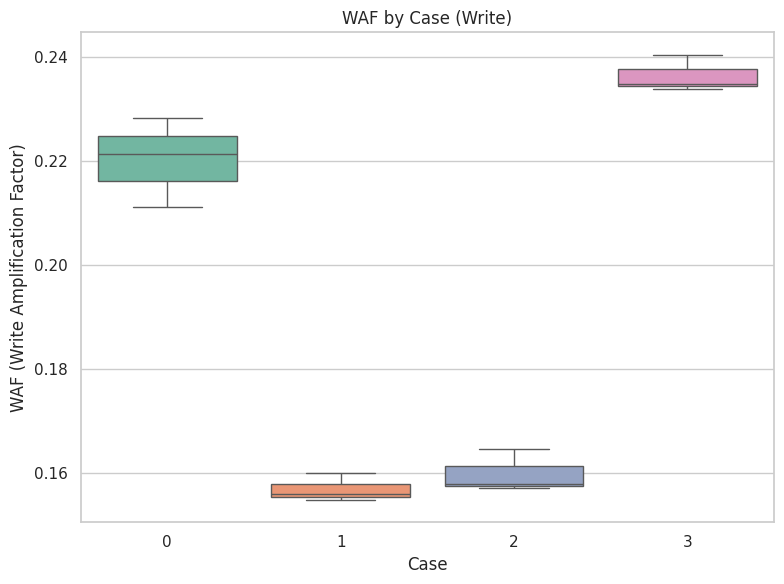

In [53]:
# Write 작업의 WAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)
plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1059/205539061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')


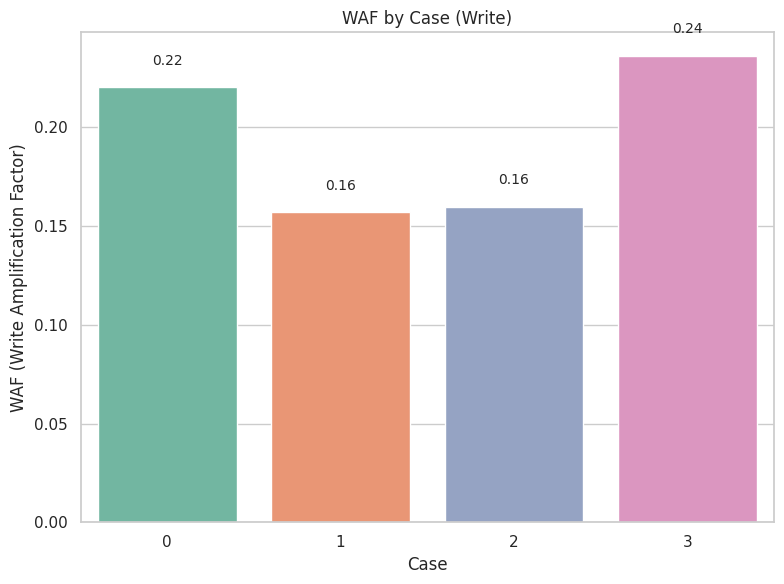

In [54]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')
plt.tight_layout()
plt.show()

In [55]:
df_write.groupby('case')['WAF'].describe()

/tmp/ipykernel_1059/3529477492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write.groupby('case')['WAF'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,0.220251,0.008572,0.211215,0.216242,0.221270,0.224769,0.228267
1,3.0,0.156932,0.002681,0.154844,0.155421,0.155998,0.157976,0.159955
2,3.0,0.159916,0.004128,0.157179,0.157542,0.157905,0.161284,0.164664
3,3.0,0.236378,0.003555,0.233892,0.234342,0.234791,0.237620,0.240450


/tmp/ipykernel_1059/773946676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='RAF', data=df_write, palette='Set2', legend=False)


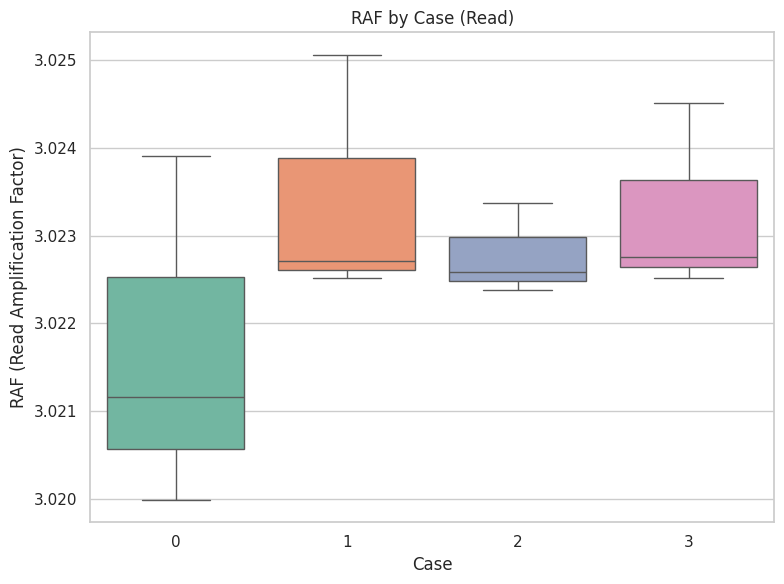

In [ ]:
# Write 작업의 RAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df_write, palette='Set2', legend=False)
plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')

plt.tight_layout()
plt.show()

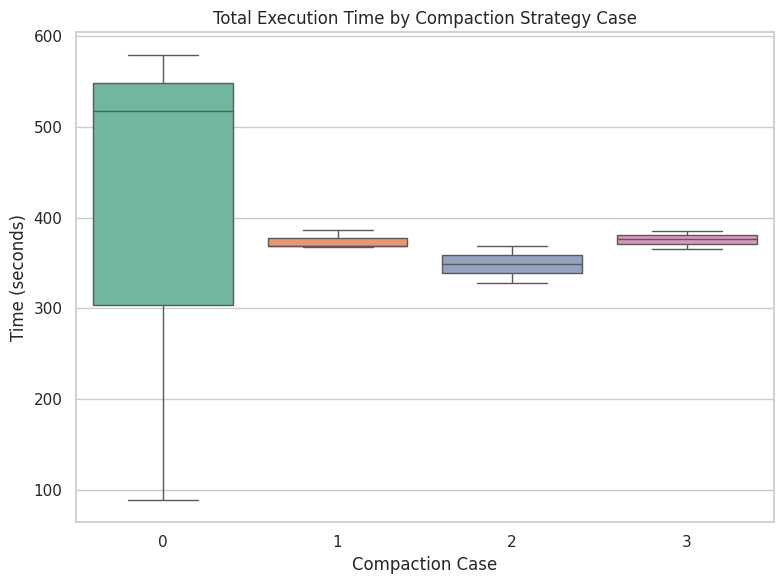

In [57]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1059/1952208775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')


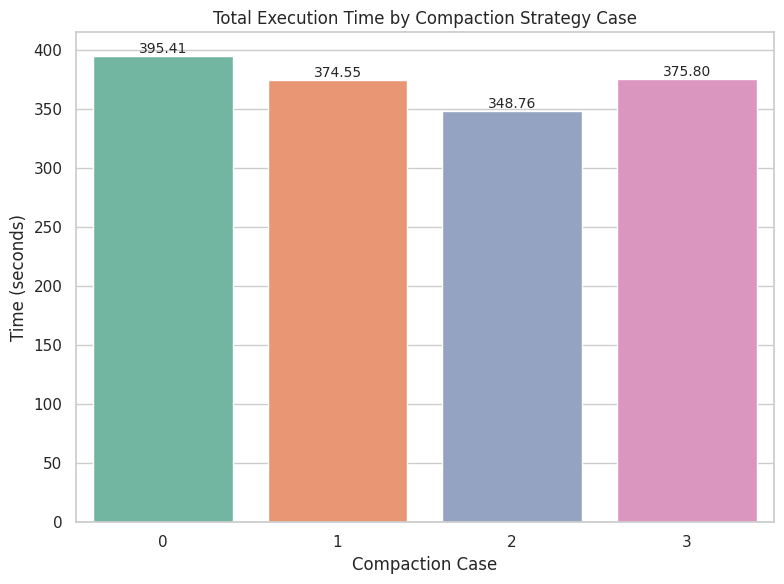

In [58]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

In [59]:
df_write.groupby('case')['time(s)'].describe()

/tmp/ipykernel_1059/387987792.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write.groupby('case')['time(s)'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,395.406333,266.777729,89.410,303.5365,517.663,548.4045,579.146
1,3.0,374.552667,10.274596,368.133,368.6275,369.122,377.7625,386.403
2,3.0,348.757000,20.375929,328.092,338.7200,349.348,359.0895,368.831
3,3.0,375.802000,9.519660,365.926,371.2430,376.560,380.7400,384.920


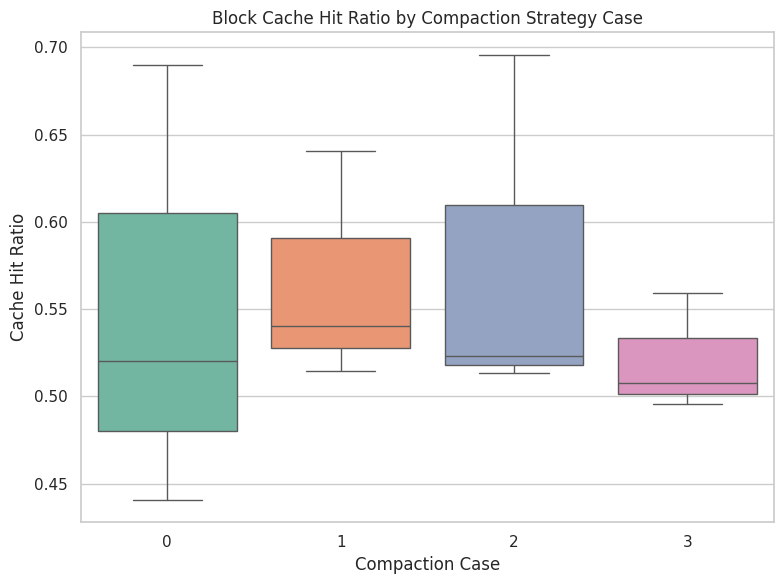

In [60]:
# Block Cache Hit Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1059/1251849913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_write_avg, palette='Set2')


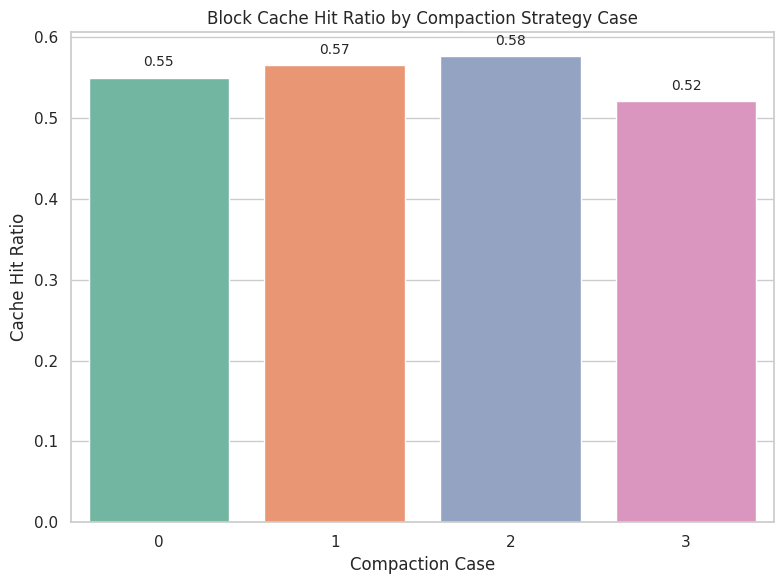

In [61]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

In [62]:
df_write.groupby('case')['cache_hit_ratio'].describe()

/tmp/ipykernel_1059/2399396083.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write.groupby('case')['cache_hit_ratio'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,0.550228,0.127337,0.440604,0.480390,0.520176,0.605039,0.689903
1,3.0,0.565281,0.066615,0.514747,0.527537,0.540326,0.590549,0.640771
2,3.0,0.577326,0.102739,0.513085,0.518080,0.523075,0.609447,0.695819
3,3.0,0.520668,0.033821,0.495327,0.501466,0.507605,0.533338,0.559072


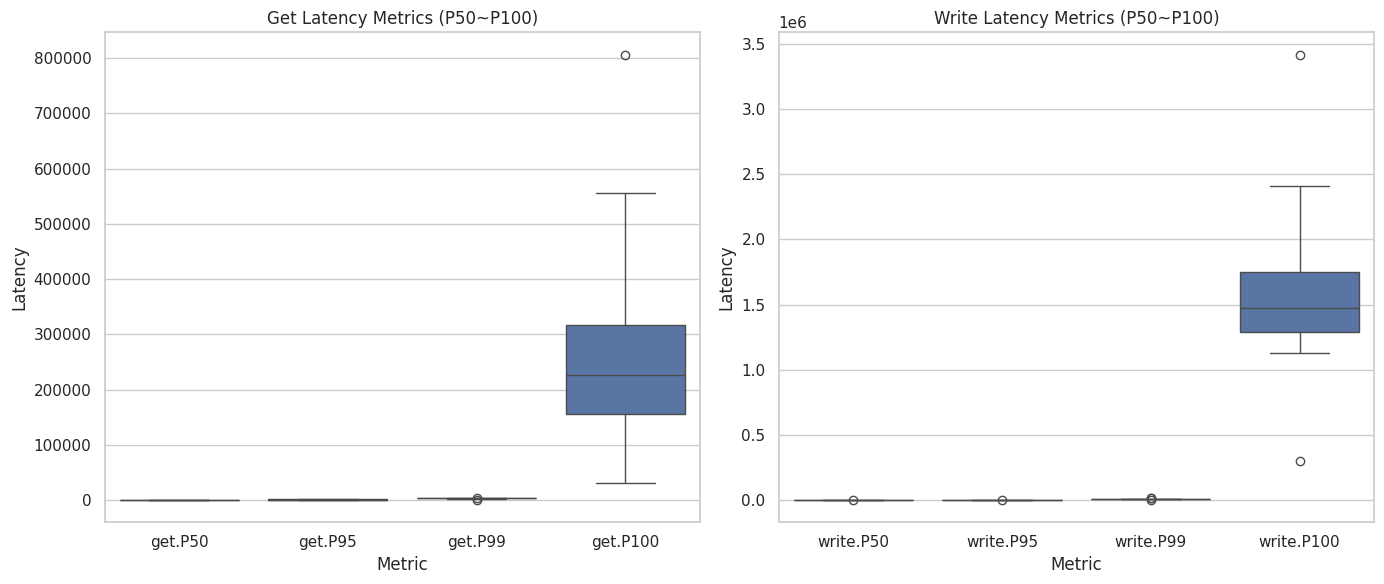

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 데이터 설정
get_metrics = ['get.P50', 'get.P95', 'get.P99', 'get.P100']
write_metrics = ['write.P50', 'write.P95', 'write.P99', 'write.P100']

# Melt for seaborn
get_melted = df_write.melt(id_vars=['case'], value_vars=get_metrics, var_name='Metric', value_name='Latency')
write_melted = df_write.melt(id_vars=['case'], value_vars=write_metrics, var_name='Metric', value_name='Latency')

# 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=get_melted, x='Metric', y='Latency')
plt.title('Get Latency Metrics (P50~P100)')

plt.subplot(1, 2, 2)
sns.boxplot(data=write_melted, x='Metric', y='Latency')
plt.title('Write Latency Metrics (P50~P100)')
plt.tight_layout()
plt.show()


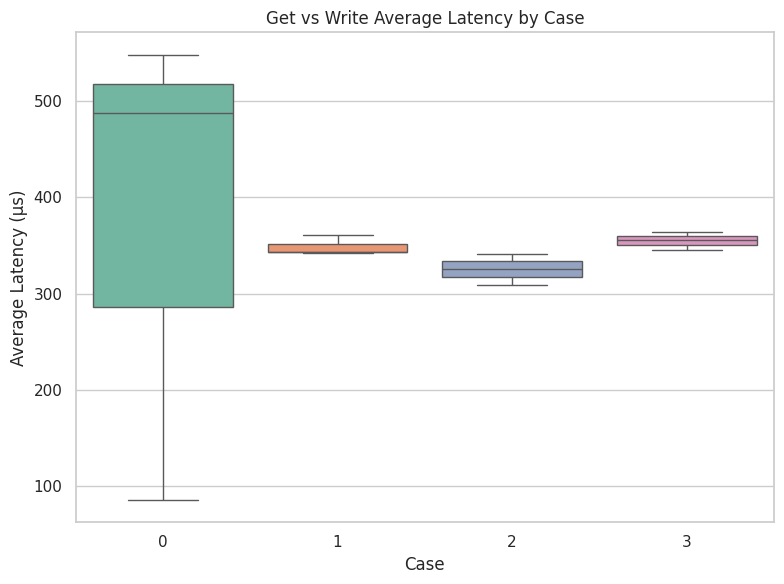

In [ ]:
# Block Cache Hit Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='write.AVG', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Get vs Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1059/2616040802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')


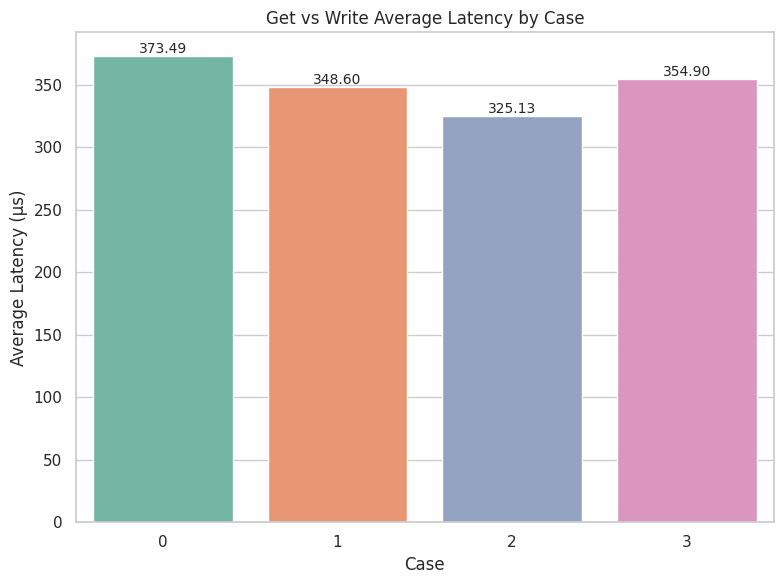

In [65]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get vs Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

In [66]:
df_write.groupby('case')['write.AVG'].describe()

/tmp/ipykernel_1059/3094318407.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write.groupby('case')['write.AVG'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,373.490860,250.859378,85.957553,286.409872,486.862191,517.257513,547.652835
1,3.0,348.601722,10.298435,342.233416,342.661046,343.088677,351.785875,360.483074
2,3.0,325.129830,16.111699,308.830323,317.171290,325.512256,333.279584,341.046912
3,3.0,354.897323,9.070323,345.451751,350.576552,355.701353,359.620109,363.538864


/tmp/ipykernel_1059/3962427703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='write.SUM', data=df_write_avg, palette='Set2')


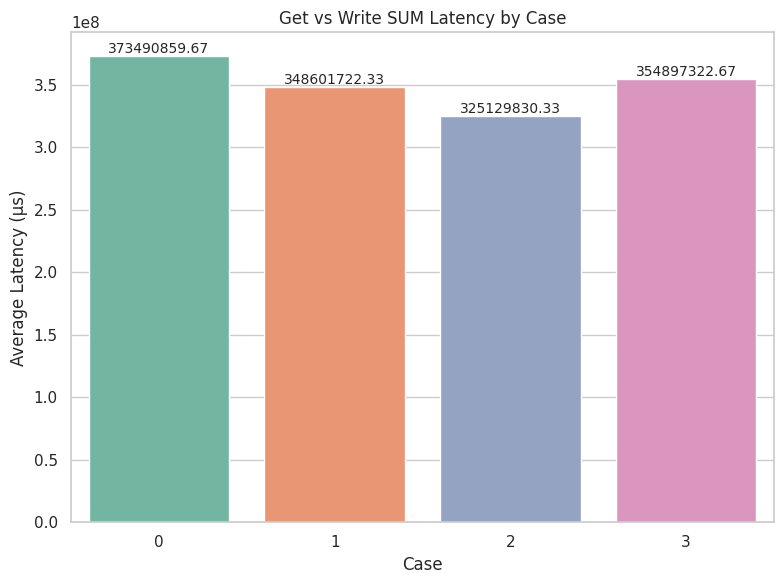

In [79]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='write.SUM', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get vs Write SUM Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

## READ

/tmp/ipykernel_1059/3602286828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)


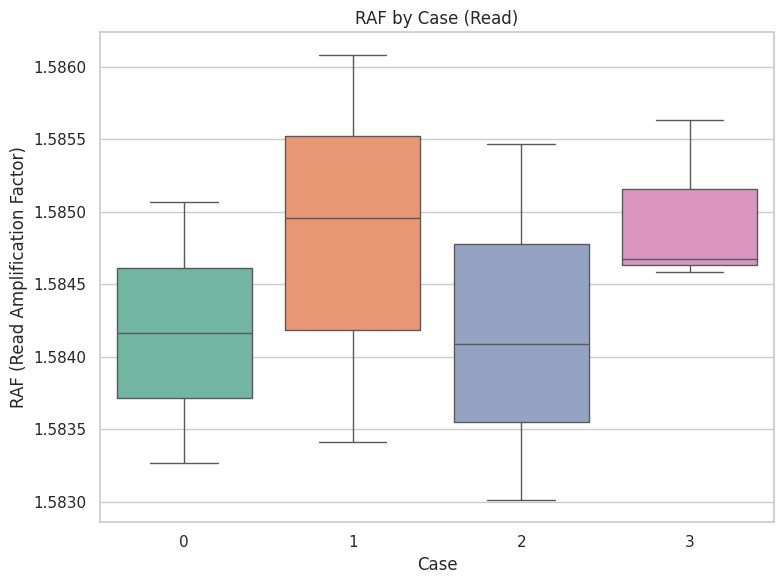

In [69]:
# Write 작업의 WAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)
plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1059/2283393793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')


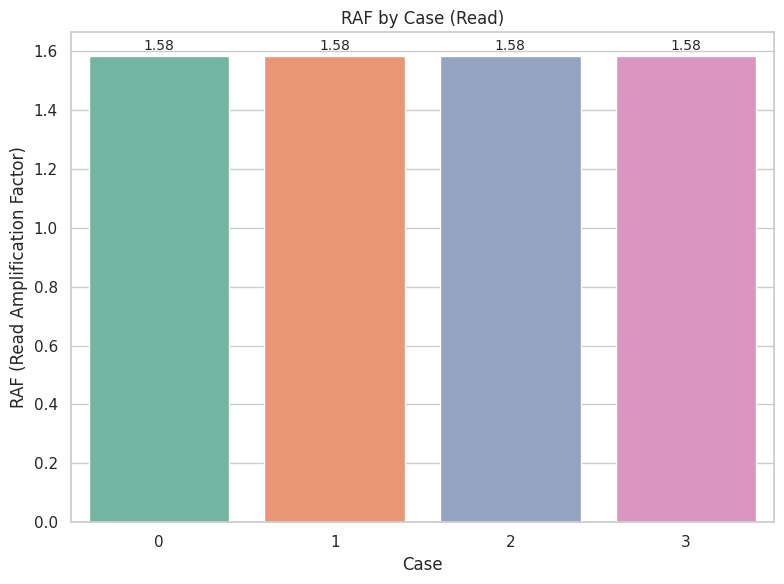

In [68]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')
plt.tight_layout()
plt.show()

In [70]:
df_write.groupby('case')['RAF'].describe()

/tmp/ipykernel_1059/2284067255.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write.groupby('case')['RAF'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,3.021682,0.002011,3.019985,3.020572,3.021159,3.022531,3.023904
1,3.0,3.023429,0.001419,3.022514,3.022612,3.022709,3.023886,3.025063
2,3.0,3.022781,0.000524,3.022382,3.022484,3.022587,3.022981,3.023374
3,3.0,3.023265,0.001091,3.022520,3.022639,3.022758,3.023637,3.024517


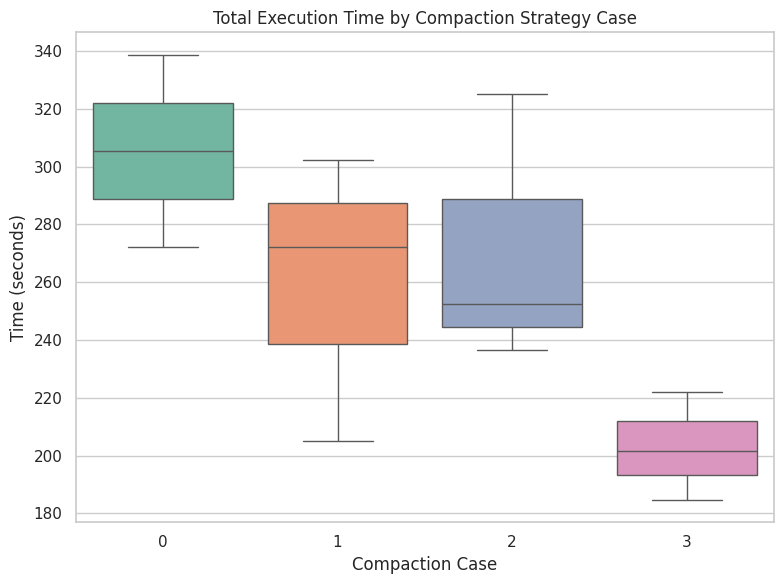

In [ ]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1059/2413868267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')


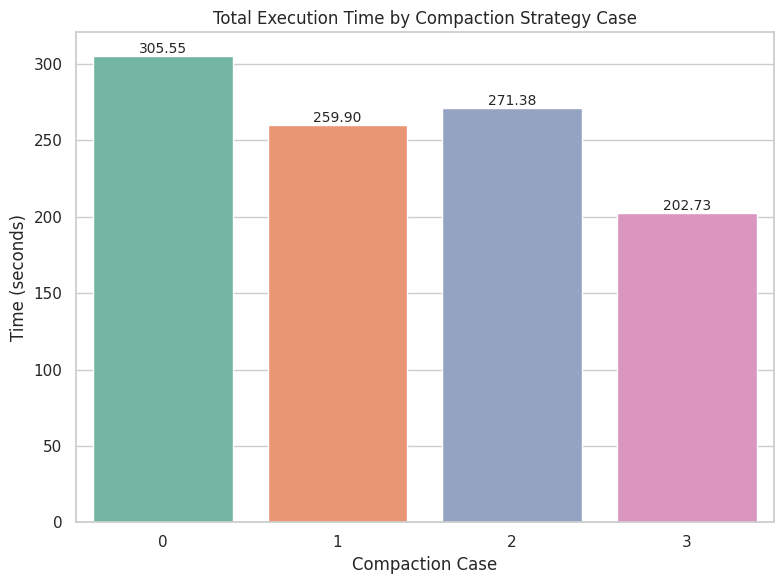

In [72]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_57240/2114742093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read['cache_hit_ratio'] = df_read['rocksdb.block.cache.hit'] / (


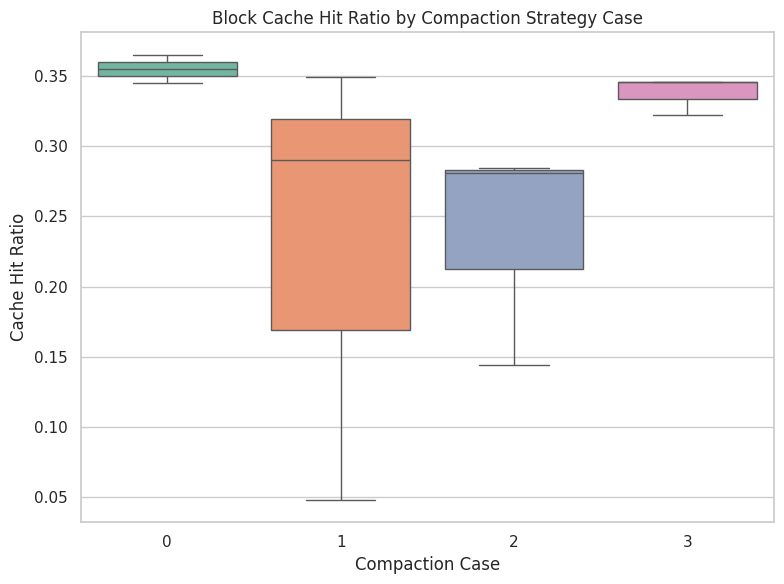

In [ ]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

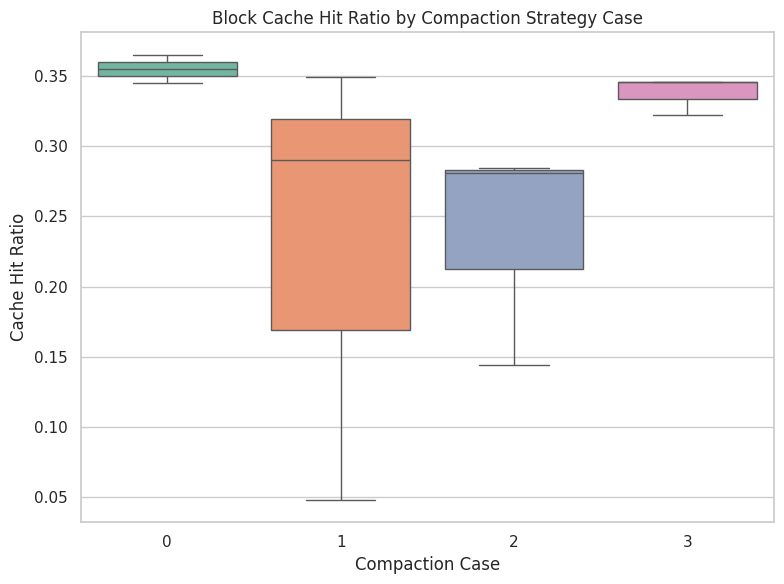

In [73]:
# Block Cache Hit Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1059/921772678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')


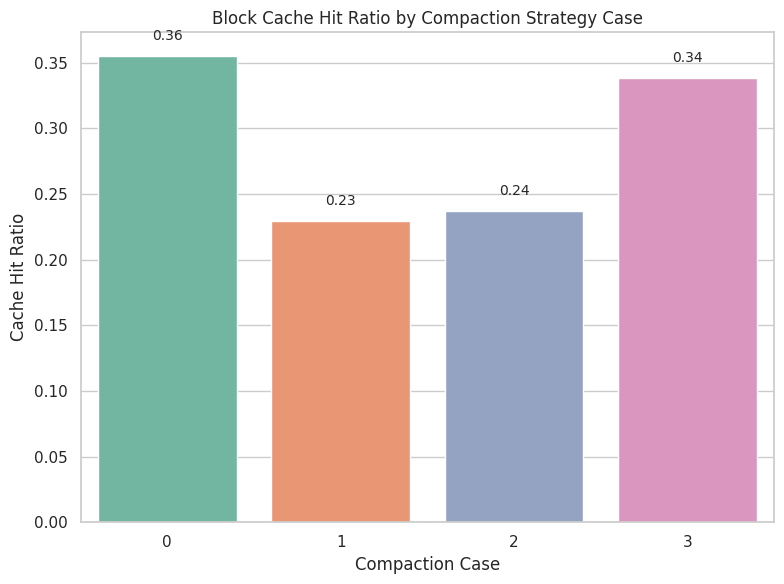

In [74]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

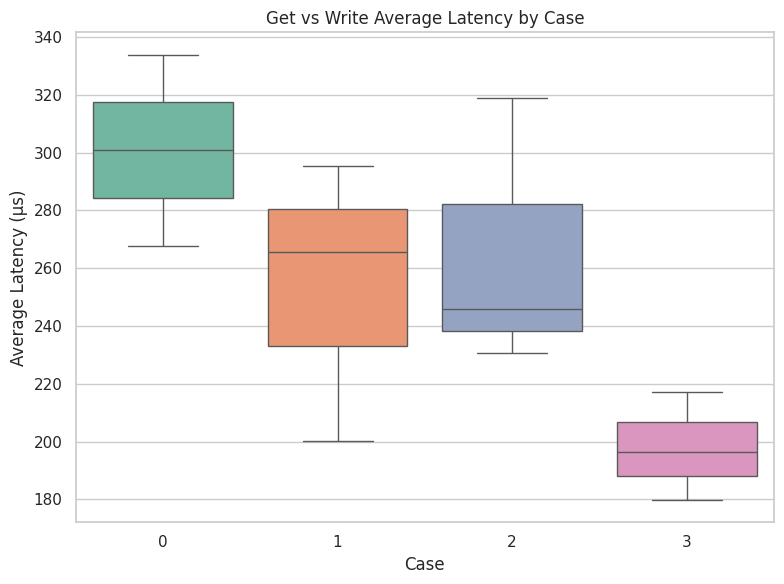

In [76]:
# Block Cache Hit Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='get.AVG', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Get vs Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1059/4191772679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')


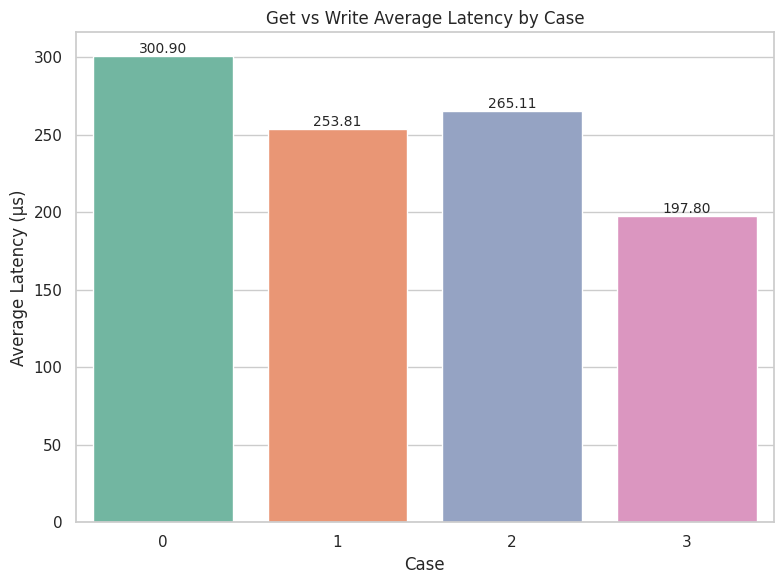

In [78]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get vs Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1059/3055362037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='get.SUM', data=df_read_avg, palette='Set2')


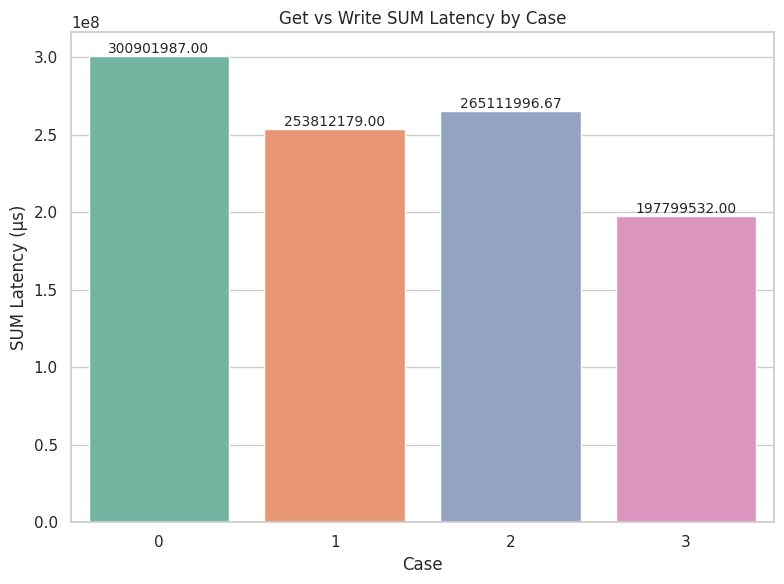

In [81]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='get.SUM', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get vs Write SUM Latency by Case')
plt.ylabel('SUM Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()